In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [8, 6]


### How to make a dataset for clustering?

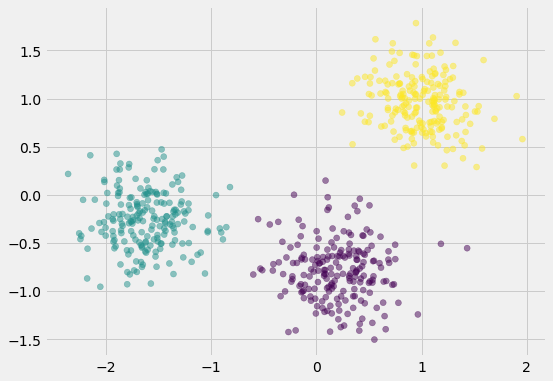

In [135]:
#gen 2d dataset
centers = [[0.2,-0.8],[-1.6,-0.2],[1.0,0.98]]
X,y = make_blobs(n_samples=600,centers=centers,n_features=2,cluster_std=0.3,random_state=2)

# Assign the columns of new_points: xs and ys
xs = X[:,0]
ys = X[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=y,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
#plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

### How many clusters to use?
Use seeds dataset:
- https://archive.ics.uci.edu/ml/datasets/seeds

In [136]:
columns = ['area','perimeter','compactness','length','width','asymmetry','length_grove','type']
df = pd.read_csv("D:\\ml_code\\datasets\\unsupervised\\seeds.csv",header=None,names=columns)
display(df.head())

#get samples into numpy - minus the label
samples = df.iloc[:,:7].values


,area,perimeter,compactness,length,width,asymmetry,length_grove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Inertia measure cluster quality - how spread out the clusters are(lower the better).  Formally the distance of each sample to centroid of its cluster.  Choose 'elbow' where inertia begins to decrease more slowly

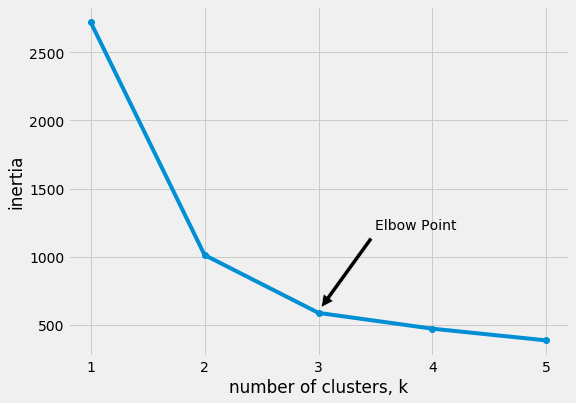

In [157]:
fig, ax = plt.subplots(figsize=(8,6))
from sklearn.cluster import KMeans
ks = list(range(1,6))

inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
# Plot ks vs inertias
ax.plot(ks, inertias, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('inertia')
ax.set_xticks(ks);
ax.annotate('Elbow Point',xy=(3,600),xytext=(3.5,1200),arrowprops=dict(facecolor='black',shrink=0.05));
#ax.show()

Looks like 3 would be a good cluster number for this data